In [33]:
import blitzgsea as blitz
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import mygene

In [5]:
# import tsquared
# import hotelling

In [332]:
# 'STAG1', 'ASH1L', 'ZMYM2', 'KDM6B', 'SRRM2', 'HIST1H1E'

In [2]:
# home_path="/home/ubuntu/" # ec2
home_path="/home/jupyter-mhaghigh@broadinst-ee45a/" #dgx
mito_project_root_dir=home_path+"bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/"

In [3]:
import numpy as np
# import scienceplots
# plt.style.use(['science','no-latex'])
def top_table_custom(signature, library, result, set_label='Set', n=10):
    alpha_rank_lines=0.6 #default 0.3
    sig = signature.sort_values(1, ascending=False).set_index(0)
    sig = sig[~sig.index.duplicated(keep='first')]

    plt.ioff()
    fig = plt.figure(figsize=(5,0.5*n), frameon=False)
    ax = fig.add_subplot(111)
    fig.patch.set_visible(False)
    plt.axis('off')

#     ax.vlines(x=[-0.2,0,0.2,0.8], ymin=-0.1, ymax=1, color="black")
    ax.vlines(x=[0,0.2,0.8], ymin=-0.1, ymax=1, color="black")
    ln = np.linspace(-0.1,1,n+1)[::-1]
    ax.hlines(y=ln, xmin=-0.2, xmax=1, color="black")

    ax.text(-.2+0.03, 1.03, "FDR", fontsize=12)
    ax.text(0.03, 1.03, "NES", fontsize=12)
    ax.text(0.84, 1.03, set_label, fontsize=12)

    for i in range(n):
        ax.text(-.2+0.03, (ln[i]+ln[i+1])/2, "{:.3f}".format(result.iloc[i, 4]), verticalalignment='center')
        ax.text(0.03, (ln[i]+ln[i+1])/2, "{:.3f}".format(result.iloc[i, 1]), verticalalignment='center')
        ax.text(0.84, (ln[i]+ln[i+1])/2, result.index[i], verticalalignment='center')
        
        gs = set(library[result.index[i]])
        hits = np.array([i for i,x in enumerate(sig.index) if x in gs])
        hits = (hits/len(sig.index))*0.6+0.2
        
        if result.iloc[i, 1] > 0:
            ax.vlines(hits, ymax=ln[i], ymin=ln[i+1], color="red", lw=0.5, alpha=alpha_rank_lines)
        else:
            ax.vlines(hits, ymax=ln[i], ymin=ln[i+1], color="blue", lw=0.5, alpha=alpha_rank_lines)
    fig.patch.set_facecolor('white')
    plt.ion()
    return fig


# p_val_orth_col="p_orth_std";#p_orth_std
orth_bh_corrected_critical_dict=\
        {'taorf': 0.0328682154922577,
         'lincs': 0.0482929972989429,
         'CDRP': 0.0481242427803521,
         'jump_orf': 0.0375156321477045,
         'jump_crispr': 0.0478530069113243,
         'jump_compound': 0.0474630677339327};



datasets_info_dict={'taorf':{'key_col':'Metadata_gene_name',\
                            'key_sample_id_col':'Metadata_broad_sample'},\
                    'jump_orf':{'key_col':'Metadata_Symbol',\
                               'key_sample_id_col':'Metadata_broad_sample'},\
                    'jump_crispr':{'key_col':'Metadata_Symbol',\
                                  'key_sample_id_col':'Metadata_JCP2022'},\
                    'jump_compound':{'key_col':'Metadata_Symbol',\
                                  'key_col_ref_set':'Metadata_JCP2022'},\
                    'lincs':{'key_col':'Metadata_pert_name',\
                            'key_col_ref_set':'Metadata_pert_id_dose'},\
                    'CDRP':{'key_col':'Metadata_pert_id',\
                            'key_col_ref_set':'Metadata_Sample_Dose'},\
                   }

# Metadata_Sample_Dose
# key_col_ref_set='Metadata_Sample_Dose'
# Metadata_pert_name_lowercase, Metadata_pert_id_dose

## Set Enrichment Analysis was done using blitzGSEA package 
- https://github.com/MaayanLab/blitzgsea

In [48]:
# ls ~/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/workspace/results/virtual_screen

## GO - ORF datasets

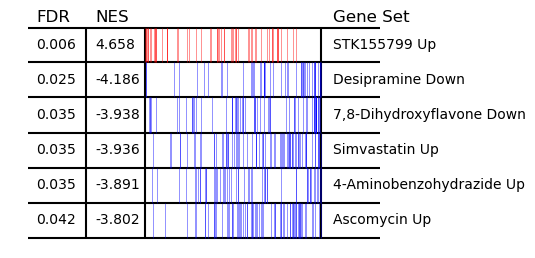

 *  jump_crispr : Out of  1748 Proteomics_Drug_Atlas_2023  categories,  6  are enriched.


In [32]:
fName='d_slope'

write_res_path=mito_project_root_dir+'workspace/results/virtual_screen/'


cell_count_filter_enabled=True
orth_filter_enabled=False


database_ls=["OMIM_Expanded","OMIM_Disease",\
             "GO_Biological_Process_2023",\
             "GO_Molecular_Function_2023",\
             "GO_Cellular_Component_2023",\
             "Human_Phenotype_Ontology","MGI_Mammalian_Phenotype_Level_4_2021",\
             "KEGG_2021_Human","WikiPathway_2021_Human","PFOCR_Pathways_2023",\
             "Proteomics_Drug_Atlas_2023",\
            "GWAS_Catalog_2023"]

plt.close('all')
for dataset in ['jump_crispr']:#['taorf','jump_orf','jump_crispr']:

    key_col=datasets_info_dict[dataset]['key_col'];
    res_df_jumporf0 = pd.read_csv(write_res_path+dataset+'_results_pattern_aug_070624.csv')
    # res_df_jumporf0['t_target_pattern_signed']=np.sign(res_df_jumporf0['t_slope'])*res_df_jumporf0['t_target_pattern']
    res_df_jumporf0 = res_df_jumporf0[~(res_df_jumporf0[key_col].isnull())& ~(res_df_jumporf0[fName].isnull())].reset_index(drop=True)
    res_df_jumporf = res_df_jumporf0.groupby(key_col).median(numeric_only=True).reset_index()



    # print(res_df_jumporf.shape)
    if cell_count_filter_enabled:
        res_df_jumporf=res_df_jumporf[res_df_jumporf['Count_Cells_avg']>res_df_jumporf['Count_Cells_avg'].quantile(.1)].\
        reset_index(drop=True)

    if orth_filter_enabled:
        res_df_jumporf=res_df_jumporf[res_df_jumporf['p_orth_std']>orth_bh_corrected_critical_dict[dataset]].\
        reset_index(drop=True)
    # print(res_df_jumporf.shape)


    sig_df=res_df_jumporf[[key_col,fName]].\
    rename(columns={key_col:0,fName:1}).\
                sort_values(by=1).reset_index(drop=True)

    
    for database_str in database_ls:
        library = blitz.enrichr.get_library(database_str)
#         sig_df[1]=sig_df[1]/10
        result_orf = blitz.gsea(sig_df, library, min_size=4, seed=1)

        top_res_df=result_orf[result_orf['fdr']<0.05]
        if len(top_res_df)>0:
            # fig_table = top_table_custom(sig_df, library, top_res_df,set_label="Gene Set: "+database_str, n=top_res_df.shape[0])
            fig_table = top_table_custom(sig_df, library, top_res_df,set_label="Gene Set ", n=top_res_df.shape[0])
            plt.show()
        #     fig_table.savefig("top_10_"+dataset+"_"+database_str+".png", bbox_inches='tight')
        if top_res_df.shape[0]>0:
            print(' * ',dataset,': Out of ',result_orf.shape[0],database_str,' categories, ',top_res_df.shape[0],' are enriched.')
            # print(top_res_df[['nes','fdr','leading_edge']].to_markdown())
#             fig_table = top_table_custom(sig_df, library, result_orf,set_label="Gene Set", n=top_res_df.shape[0])
    # fig_table.savefig(dataset+"_top_table.png", bbox_inches='tight')
#             plt.show()
#         result_orf.head(10)

        

In [35]:
# top_res_df

In [47]:
# # res_df_jumporf0 = pd.read_csv(write_res_path+dataset+'_results_pattern_1.csv')
# res_df_jumporf0=pd.read_csv(write_res_path+dataset+'_results_pattern_aug_070624.csv')
# res_df_jumporf0.groupby(key_col).median().reset_index()

## Table 3 Genes

| Term                    |       es |      nes |     pval |    sidak |     fdr |   geneset_size |
|:------------------------|---------:|---------:|---------:|---------:|--------:|---------------:|
| Mitochondrial transport | 0.411155 | 0.69583  | 0.486535 | 0.736354 | 0.80508 |             13 |
| Mitochondrial dynamics  | 0.240889 | 0.246778 | 0.80508  | 0.962006 | 0.80508 |             50 |


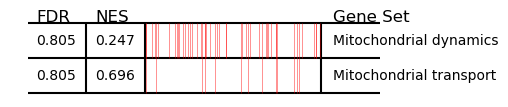

| Term                    |        es |      nes |      pval |     sidak |       fdr |   geneset_size |
|:------------------------|----------:|---------:|----------:|----------:|----------:|---------------:|
| Mitochondrial dynamics  | -0.481325 | -2.42245 | 0.0154165 | 0.0305952 | 0.0308329 |             28 |
| Mitochondrial transport | -0.537558 | -1.41864 | 0.156005  | 0.287672  | 0.156005  |             11 |


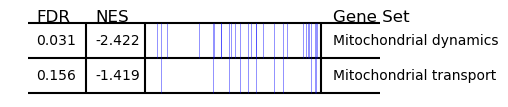

In [13]:
fName='d_slope'
write_res_path=mito_project_root_dir+'workspace/results/virtual_screen/'


cell_count_filter_enabled=False
orth_filter_enabled=False

# ------------------------------

# Fusion Fission Transport Mitophagy
Fusion_ls=['AFG3L2','BAK1','BAX','BNIP3','CHCHD3','DNM1L','FIS1','GDAP1','MFF','MFN1','MFN2','MIEF1','MIEF2','MUL1',\
'OMA1','OPA1','PLD6','PRKN','STOML2','USP30']
Fission_ls=['BNIP3','COX10','DHODH','DNM1L','DNM2','DNM3','FIS1','GDAP1',\
'LRRK2','MARCH5','MFF','MIEF1','MIEF2','MTFP1','MTFR1','MTFR1L','MTFR2','MUL1','MYO19','OPA1','PINK1',\
'PRKN','SLC25A46']
Transport_ls=['CLUH','DNM1L','KIF1B','LRPPRC','LRRK2','MAIP1','MAP1S','MFN1','MFN2','MGARP','MST01',\
'MUL1','OPA1','RHOT1','RHOT2','SYNJ2BP','TRAK1','TRAK2','UBB']
Mitophagy_ls=['ATPIF1','BNIP3','BNIP3L','CISD2','DNM1L',\
 'FIS1','FUNDC1','FUNDC2','HK2','HTRA2','MFN2','MUL1','PARK7','PINK1','SQSTM1','TOMM7','TSPO','VDAC1']


table3_list=['AFG3L2','BAK1','BAX','BNIP3','CHCHD3','DNM1L','FIS1','GDAP1','MFF','MFN1','MFN2','MIEF1','MIEF2','MUL1',\
'OMA1','OPA1','PLD6','PRKN','STOML2','USP30','BNIP3','COX10','DHODH','DNM1L','DNM2','DNM3','FIS1','GDAP1',\
'LRRK2','MARCH5','MFF','MIEF1','MIEF2','MTFP1','MTFR1','MTFR1L','MTFR2','MUL1','MYO19','OPA1','PINK1',\
'PRKN','SLC25A46','CLUH','DNM1L','KIF1B','LRPPRC','LRRK2','MAIP1','MAP1S','MFN1','MFN2','MGARP','MST01',\
'MUL1','OPA1','RHOT1','RHOT2','SYNJ2BP','TRAK1','TRAK2','UBB','ATPIF1','BNIP3','BNIP3L','CISD2','DNM1L',\
 'FIS1','FUNDC1','FUNDC2','HK2','HTRA2','MFN2','MUL1','PARK7','PINK1','SQSTM1','TOMM7','TSPO','VDAC1']
# library_table3={'Table3genes':list(set(table3_list)),'Fusion':Fusion_ls,'Fission':Fission_ls,\
#                 'Transport':Transport_ls,'Mitophagy':Mitophagy_ls}

# key_sample_id_col='Metadata_broad_sample'
plt.close('all')
for dataset in ['jump_orf','jump_crispr']:

    key_col=datasets_info_dict[dataset]['key_col'];
#     key_sample_id_col=datasets_info_dict[dataset]['key_sample_id_col'];
    key_sample_id_col =datasets_info_dict[dataset]['key_sample_id_col'];

    
    res_df_jumporf0 = pd.read_csv(write_res_path+dataset+'_results_pattern_aug_070624.csv')
    res_df_jumporf0['t_target_pattern_signed']=np.sign(res_df_jumporf0['t_slope'])*res_df_jumporf0['t_target_pattern']
    res_df_jumporf0 = res_df_jumporf0[~(res_df_jumporf0[key_col].isnull())& ~(res_df_jumporf0[fName].isnull())].reset_index(drop=True)
#     res_df_jumporf = res_df_jumporf0.groupby(key_col).median(numeric_only=True).reset_index()

    # Define the aggregation dictionary
    agg_dict = {col: 'median' if pd.api.types.is_numeric_dtype(res_df_jumporf0[col]) else\
                'first' for col in res_df_jumporf0.columns if col != key_sample_id_col}

    # Group by key_sample_id_col and aggregate
    res_df_jumporf = res_df_jumporf0.groupby(key_sample_id_col).agg(agg_dict).reset_index()



    Transport_ls_brd=res_df_jumporf.loc[res_df_jumporf[key_col].isin(Transport_ls),\
                                                key_sample_id_col].unique().tolist()

    table3_ls_brd=res_df_jumporf.loc[res_df_jumporf[key_col].isin(table3_list),\
                                                key_sample_id_col].unique().tolist()


    # library_table3={'Table3genes':list(set(table3_list)),'Transport':Transport_ls}
    # library_table3={'Table3genes':list(set(table3_list)),'Transport':Transport_ls}
    library_table3={'Mitochondrial dynamics':list(set(table3_ls_brd)),'Mitochondrial transport':Transport_ls_brd}


    # print(res_df_jumporf.shape)
    if cell_count_filter_enabled:
        res_df_jumporf=res_df_jumporf[res_df_jumporf['Count_Cells_avg']>res_df_jumporf['Count_Cells_avg'].quantile(.1)].\
        reset_index(drop=True)

    if orth_filter_enabled:
        res_df_jumporf=res_df_jumporf[res_df_jumporf['p_orth_std']>orth_bh_corrected_critical_dict[dataset]].\
        reset_index(drop=True)
    # print(res_df_jumporf.shape)


    sig_df=res_df_jumporf[[key_sample_id_col,fName]].\
    rename(columns={key_sample_id_col:0,fName:1}).\
                sort_values(by=1).reset_index(drop=True)

    
    result_table3set = blitz.gsea(sig_df, library_table3, seed=1)
    
    print(result_table3set[['es','nes','pval','sidak','fdr','geneset_size']].to_markdown(index=True))
    
    fig_table = top_table_custom(sig_df, library_table3, result_table3set.sort_values(by='Term'),set_label="Gene Set", n=2)
    # fig_table.savefig(dataset+"_top_table.png", bbox_inches='tight')
    plt.show()
    result_table3set

        

,es,nes,pval,sidak,fdr,geneset_size,leading_edge
Term,,,,,,,
Mitochondrial dynamics,-0.481325,-2.422445,0.015416,0.030595,0.030833,28,"JCP2022_807239,JCP2022_803667,JCP2022_800823,J..."
Mitochondrial transport,-0.537558,-1.418637,0.156005,0.287672,0.156005,11,"JCP2022_803667,JCP2022_807239,JCP2022_805963"


In [13]:
# agg_dict

In [5]:
print(result_table3set[['es','nes','pval','sidak','fdr','geneset_size']].to_markdown(index=True))

| Term        |        es |      nes |      pval |     sidak |       fdr |   geneset_size |
|:------------|----------:|---------:|----------:|----------:|----------:|---------------:|
| Table3genes | -0.481325 | -2.42245 | 0.0154165 | 0.0305952 | 0.0308329 |             28 |
| Transport   | -0.537558 | -1.41864 | 0.156005  | 0.287672  | 0.156005  |             11 |


In [10]:
mito_project_root_dir

'/home/jupyter-mhaghigh@broadinst-ee45a/bucket/projects/2016_08_01_RadialMitochondriaDistribution_donna/'

## SZ related genes according to "Rare coding variants in ten genes confer substantial risk for schizophrenia" nature paper

##  jump_orf
{'SZ genes': ['GRIN2A', 'GRIA3', 'CUL1', 'XPO7', 'SP4'], 'DD/ID genes': ['PMEPA1'], 'Misc genes': []}
| Term        |       es |      nes |     pval |    sidak |      fdr |   geneset_size |
|:------------|---------:|---------:|---------:|---------:|---------:|---------------:|
| SZ genes    | 0.631113 | 1.04136  | 0.297711 | 0.50679  | 0.391194 |              5 |
| DD/ID genes | 0.608748 | 0.857453 | 0.391194 | 0.629356 | 0.391194 |              2 |


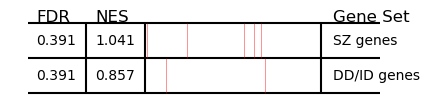

##  jump_crispr
{'SZ genes': ['CUL1', 'GRIA3', 'GRIN2A', 'TRIO', 'HERC1', 'CACNA1G', 'SP4'], 'DD/ID genes': ['ASH1L', 'STAG1'], 'Misc genes': ['AKAP11', 'CACNA1A']}
| Term        |        es |       nes |      pval |    sidak |      fdr |   geneset_size |
|:------------|----------:|----------:|----------:|---------:|---------:|---------------:|
| Misc genes  | -0.774414 | -1.68418  | 0.0921469 | 0.25175  | 0.276441 |              2 |
| DD/ID genes |  0.597601 |  1.11434  | 0.265135  | 0.603154 | 0.397703 |              2 |
| SZ genes    |  0.454436 |  0.519399 | 0.603483  | 0.937657 | 0.603483 |              6 |


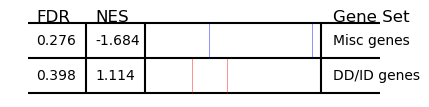

In [46]:
fName='d_slope'
write_res_path=mito_project_root_dir+'workspace/results/virtual_screen/'


cell_count_filter_enabled=True
orth_filter_enabled=False

# ------------------------------

SZ_genes_Daly=['CACNA1G', 'GRIN2A', 'GRIA3', 'TRIO', 'SP4', 'RB1CC1' , 'SETD1A','XPO7','CUL1','HERC1']
DD_genes_Daly=['STAG1', 'ASH1L', 'ZMYM2', 'KDM6B', 'SRRM2', 'HIST1H1E',\
              'PMEPA1']
misc_genes=['CACNA1A','AKAP11','SETD1A']


# key_sample_id_col='Metadata_broad_sample'

plt.close('all')
for dataset in ['jump_orf','jump_crispr']:

    key_col=datasets_info_dict[dataset]['key_col'];
#     key_sample_id_col=datasets_info_dict[dataset]['key_sample_id_col'];
    key_sample_id_col =datasets_info_dict[dataset]['key_sample_id_col'];

    
    res_df_jumporf0 = pd.read_csv(write_res_path+dataset+'_results_pattern_aug_070624.csv')
    res_df_jumporf0 = res_df_jumporf0[~(res_df_jumporf0[key_col].isnull())& ~(res_df_jumporf0[fName].isnull())].reset_index(drop=True)
#     res_df_jumporf = res_df_jumporf0.groupby(key_col).median(numeric_only=True).reset_index()

    # Define the aggregation dictionary
    agg_dict = {col: 'median' if pd.api.types.is_numeric_dtype(res_df_jumporf0[col]) else\
                'first' for col in res_df_jumporf0.columns if col != key_sample_id_col}

    # Group by key_sample_id_col and aggregate
    res_df_jumporf = res_df_jumporf0.groupby(key_sample_id_col).agg(agg_dict).reset_index()


    library_Daly={};library_Daly_symbols={};
    gls_names=['SZ genes','DD/ID genes','Misc genes']
    for gls_name, gls in zip(gls_names,[SZ_genes_Daly,DD_genes_Daly,misc_genes]):
        library_Daly[gls_name]=list(set(res_df_jumporf.loc[res_df_jumporf[key_col].isin(gls),\
                                                key_sample_id_col].unique().tolist()))
        library_Daly_symbols[gls_name]=list(set(res_df_jumporf.loc[res_df_jumporf[key_col].isin(gls),\
                                                key_col].unique().tolist()))
        
    
    print('## ',dataset)
    print(library_Daly_symbols)

    # print(res_df_jumporf.shape)
    if cell_count_filter_enabled:
        res_df_jumporf=res_df_jumporf[res_df_jumporf['Count_Cells_avg']>res_df_jumporf['Count_Cells_avg'].quantile(.1)].\
        reset_index(drop=True)

    if orth_filter_enabled:
        res_df_jumporf=res_df_jumporf[res_df_jumporf['p_orth_std']>orth_bh_corrected_critical_dict[dataset]].\
        reset_index(drop=True)
    # print(res_df_jumporf.shape)


    sig_df=res_df_jumporf[[key_sample_id_col,fName]].\
    rename(columns={key_sample_id_col:0,fName:1}).\
                sort_values(by=1).reset_index(drop=True)

    
    result_Daly = blitz.gsea(sig_df, library_Daly,min_size=1, seed=1)
    
    print(result_Daly[['es','nes','pval','sidak','fdr','geneset_size']].to_markdown(index=True))
    
    fig_table = top_table_custom(sig_df, library_Daly, result_Daly,set_label="Gene Set", n=2)
    # # fig_table.savefig(dataset+"_top_table.png", bbox_inches='tight')
    plt.show()
    # result_Daly

        

## Rakesh Categories - LINCS

## Experiment our list towards Rakesh categories on LINCS set

- All antipsychotics 9  out of  13  exists in LINCS set.
- Atypical Antipsychotics 6  out of  8  exists in LINCS set.
- Typical antipsychotics 3  out of  6  exists in LINCS set.
- Mood stabilizers 2  out of  4  exists in LINCS set.
- Antidepressants 5  out of  8  exists in LINCS set.
- All psychotropics 18  out of  34  exists in LINCS set.
- HDAC inhibitor 0  out of  10  exists in LINCS set.
- Wnt Modulators 1  out of  13  exists in LINCS set.
- Hormones 6  out of  15  exists in LINCS set.
- ER stressors 0  out of  4  exists in LINCS set.
- Mitochondrial Stressors 1  out of  8  exists in LINCS set.
- Calcium channel blockers 2  out of  4  exists in LINCS set.


/home/jupyter-mhaghigh@broadinst-ee45a/.conda/envs/gan/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


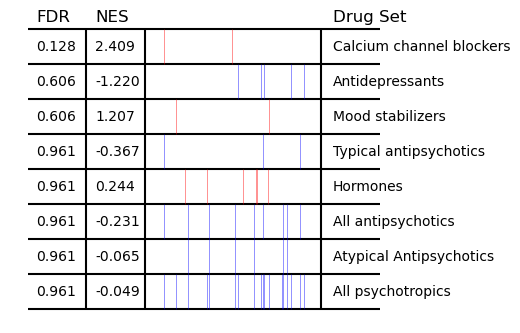

In [81]:
### set params

target_feat="d_slope"


dataset='lincs'

cell_count_filter_enabled=False
orth_filter_enabled=False

## compound selection strategies
# 1. keeping all doses


# 2. keep just the dose with maximum phenotype strength


res_df_lincs = pd.read_csv(write_res_path+dataset+'_results_pattern_aug_070624.csv')
# res_df_lincs['t_target_pattern_signed']=np.sign(res_df_lincs['t_slope'])*res_df_lincs['t_target_pattern']
# res_df_lincs[target_feat+'_abs']=res_df_lincs[target_feat].abs()

res_df_lincs=res_df_lincs[~(res_df_lincs[target_feat].isnull()) & ~(res_df_lincs['Metadata_pert_name'].isnull())].reset_index(drop=True)

res_df_lincs[target_feat+'_abs']=res_df_lincs[target_feat].abs()

drug_list_rakesh0=pd.read_excel(mito_project_root_dir+"workspace/metadata/CompoundClusters08202104.xlsx")



                    # 'lincs':{'key_col':'Metadata_pert_name',\
                            # 'key_col_ref_set':'Metadata_pert_id_dose'},\

if cell_count_filter_enabled:
    res_df_lincs=res_df_lincs[res_df_lincs['Count_Cells_avg']>res_df_lincs['Count_Cells_avg'].quantile(.1)].\
    reset_index(drop=True)
if orth_filter_enabled:
    res_df_lincs=res_df_lincs[res_df_lincs['p_orth_std']>orth_bh_corrected_critical_dict[dataset]].\
    reset_index(drop=True)

    
lincs_prt_names=set(res_df_lincs['Metadata_pert_name'].str.lower().unique())
res_df_lincs['Metadata_pert_name_lowercase']=res_df_lincs['Metadata_pert_name'].str.lower()

if 1:
    abs_max_indices=res_df_lincs.groupby(['Metadata_pert_id'])[target_feat+'_abs'].idxmax().values
    abs_max_indices=res_df_lincs.groupby(['Metadata_pert_name_lowercase'])[target_feat+'_abs'].idxmax().values
    res_df_lincs = res_df_lincs.loc[abs_max_indices].reset_index(drop=True)


rakesh_cats=drug_list_rakesh0.columns.tolist()
# ap_table=pd.DataFrame(index=rakesh_cats,columns=['AP','AP-abs','Baseline-AP'])

key_col_ref_set='Metadata_pert_name_lowercase'
key_col_ref_set='Metadata_pert_id'
# key_col_ref_set='Metadata_pert_id_dose'


lib_rakesh={}
for r in rakesh_cats:
    overlap_drugs=set(drug_list_rakesh0[r].str.lower().unique()) & lincs_prt_names
    overlap_drugs={x for x in overlap_drugs if x==x}
    if len(overlap_drugs)>0:
#         lib_rakesh[r]=list(overlap_drugs)
        ## if adding all doses
#         pert_id_dose_ls=res_df_lincs2.loc[res_df_lincs2['Metadata_pert_name_lowercase'].isin(overlap_drugs),'Metadata_pert_name_lowercase'].tolist()
        pert_id_dose_ls=res_df_lincs.loc[res_df_lincs['Metadata_pert_name_lowercase'].isin(overlap_drugs),\
                                         key_col_ref_set].unique().tolist()
        if len(pert_id_dose_ls)>1:
            lib_rakesh[r]=list(pert_id_dose_ls)
        
    print('-',r, len(overlap_drugs),' out of ',len(set(drug_list_rakesh0[r].str.lower().unique())), ' exists in LINCS set.')
####################################


sig_df_lincs=res_df_lincs[[key_col_ref_set,target_feat]].\
rename(columns={key_col_ref_set:0,target_feat:1}).\
            sort_values(by=1).reset_index(drop=True)


# sig_df_lincs=sig_df_lincs.groupby([0]).mean().reset_index()
result_rakesh_enrich = blitz.gsea(sig_df_lincs, lib_rakesh,min_size=5, seed=1)
plt.close('all')
####################################
fig_table = top_table_custom(sig_df_lincs, lib_rakesh, result_rakesh_enrich,set_label="Drug Set", n=result_rakesh_enrich.shape[0])
plt.show()
# fig_table.savefig("ES_rakesh_new.png", bbox_inches='tight')

In [80]:
result_rakesh_enrich

,es,nes,pval,sidak,fdr,geneset_size,leading_edge
Term,,,,,,,
Antidepressants,-0.660590,-1.220380,0.222321,0.778791,0.961189,5,"BRD-K70464547,BRD-K53737926"
Typical antipsychotics,-0.384561,-0.367009,0.713612,0.999448,0.961189,3,BRD-K89732114
Hormones,0.331704,0.243840,0.807355,0.999949,0.961189,6,BRD-A18917088
All antipsychotics,-0.264294,-0.230724,0.817529,0.999963,0.961189,9,"BRD-K29582115,BRD-K53857191,BRD-K89732114"
Atypical Antipsychotics,-0.245307,-0.064502,0.948570,1.000000,0.961189,6,"BRD-K70358946,BRD-K29582115,BRD-K53857191,BRD-..."
All psychotropics,-0.296622,-0.048661,0.961189,1.000000,0.961189,18,"BRD-K29582115,BRD-K53857191,BRD-K70464547,BRD-..."


In [66]:
lib_rakesh.keys()

dict_keys(['All antipsychotics', 'Atypical Antipsychotics', 'Typical antipsychotics', 'Mood stabilizers', 'Antidepressants', 'All psychotropics', 'Hormones', 'Calcium channel blockers'])

In [36]:
# sig_df_lincs.groupby([0]).mean().reset_index()
# res_df_lincs.groupby('Metadata_pert_name_lowercase').size().sort_values()

In [37]:
# sig_df_lincs.groupby([0]).size().sort_values()
# sig_df_lincs

In [129]:
print(result_rakesh_enrich.rename(columns={'geneset_size':'drugset_size'})[['es','nes','pval','fdr','drugset_size']].to_markdown(index=True))

| Term                     |        es |       nes |     pval |      fdr |   drugset_size |
|:-------------------------|----------:|----------:|---------:|---------:|---------------:|
| Antidepressants          | -0.66059  | -1.61572  | 0.106154 | 0.849233 |              5 |
| Calcium channel blockers |  0.781547 |  1.15148  | 0.249537 | 0.998147 |              2 |
| All psychotropics        | -0.296622 | -0.450306 | 0.65249  | 1        |             18 |
| Hormones                 |  0.331704 |  0.288184 | 0.773206 | 1        |              6 |
| Mood stabilizers         |  0.554875 |  0.262434 | 0.792987 | 1        |              2 |
| All antipsychotics       | -0.264294 | -0        | 1        | 1        |              9 |
| Atypical Antipsychotics  | -0.245307 | -0        | 1        | 1        |              6 |
| Typical antipsychotics   | -0.384561 | -0        | 1        | 1        |              3 |


In [162]:
result_rakesh_enrich.columns

Index(['es', 'nes', 'pval', 'sidak', 'fdr', 'geneset_size', 'leading_edge'], dtype='object')

In [67]:
fig_table = top_table_custom(sig_df_lincs, lib_rakesh, result_rakesh_enrich, n=8)
fig_table.savefig("ES_rakesh.png", bbox_inches='tight')

In [10]:
# result_rakesh_enrich = blitz.gsea(sig_df_lincs, lib_rakesh)

# # fig = blitz.plot.running_sum(sig_df_lincs, "Table3genes", lib_rakesh, result=result_rakesh_enrich, compact=False)
# # fig.savefig("ES_rakesh1.png", bbox_inches='tight')

# # fig_compact = blitz.plot.running_sum(sig_df_lincs, "Table3genes", lib_rakesh, result=result_rakesh_enrich, compact=True)
# # fig_compact.savefig("ES_rakesh2.png", bbox_inches='tight')

# fig_table = blitz.plot.top_table(sig_df_lincs, lib_rakesh, result_rakesh_enrich, n=5)
# fig_table.savefig("ES_rakesh_max.png", bbox_inches='tight')

fig_table = top_table_custom(sig_df_lincs, lib_rakesh, result_rakesh_enrich, n=5, seed=1)
fig_table.savefig("ES_rakesh_max2.png", bbox_inches='tight')


In [28]:
for r in lib_rakesh.keys():
    fig = blitz.plot.running_sum(sig_df_lincs, r, lib_rakesh, result=result_rakesh_enrich, compact=False)
    fig.savefig("ES_rakesh_"+r+".png", bbox_inches='tight')

In [148]:
print(result_rakesh_enrich.rename(columns={'geneset_size':'drugset_size'}).to_markdown(index=True))

| Term                    |        es |       nes |     pval |    sidak |      fdr |   drugset_size | leading_edge                                                                                                                                                                                                           |
|:------------------------|----------:|----------:|---------:|---------:|---------:|---------------:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Hormones                |  0.517187 |  0.765063 | 0.444234 | 0.946977 | 0.785823 |              6 | dehydroepiandrosterone,prednisone,estradiol                                                                                                                                                                            |
| All psychotropics       | -0.150685 | -0.

In [8]:
result_rakesh_enrich

NameError: name 'result_rakesh_enrich' is not defined

In [72]:
# res_df_lincs[res_df_lincs['Metadata_pert_name_lowercase']=='sertraline']

In [29]:
# res_df_lincs['Metadata_moa'].shape,
# res_df_lincs['Metadata_moa'].unique()

In [21]:
# res_df_lincs_nonnan_moa=res_df_lincs[~res_df_lincs['Metadata_moa'].isnull()].reset_index(drop=True)

In [20]:
# res_df_lincs_nonnan_moa.loc[res_df_lincs_nonnan_moa['Metadata_moa'].str.contains('norepinephrine reuptake inhibitor'),'Metadata_moa'].unique()

## Enrichement of MOA classes - new pattern

/tmp/ipykernel_52913/2801621333.py:69: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pert_id_dose_ls=res_df_lincs_nonnan_moa.loc[res_df_lincs_nonnan_moa['Metadata_moa'].str.contains(r),\


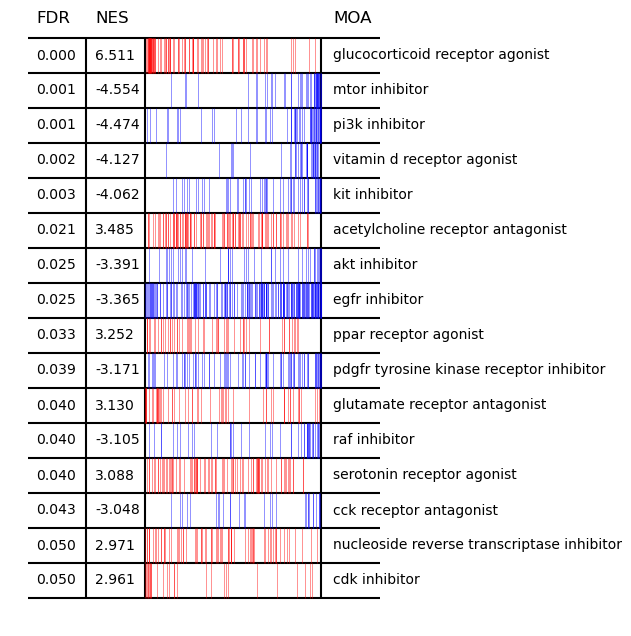

lincs  has  488  MOA categories!  259  have min size more than  10
16 / 259  categories are enriched!
Index(['glucocorticoid receptor agonist', 'mtor inhibitor', 'pi3k inhibitor',
       'vitamin d receptor agonist', 'kit inhibitor',
       'acetylcholine receptor antagonist', 'akt inhibitor', 'egfr inhibitor',
       'ppar receptor agonist', 'pdgfr tyrosine kinase receptor inhibitor',
       'glutamate receptor antagonist', 'raf inhibitor',
       'serotonin receptor agonist', 'cck receptor antagonist',
       'nucleoside reverse transcriptase inhibitor', 'cdk inhibitor'],
      dtype='object', name='Term')


/tmp/ipykernel_52913/2801621333.py:69: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pert_id_dose_ls=res_df_lincs_nonnan_moa.loc[res_df_lincs_nonnan_moa['Metadata_moa'].str.contains(r),\


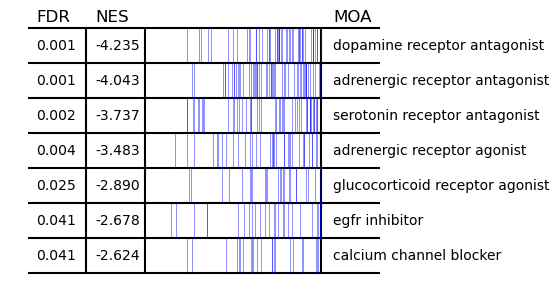

CDRP  has  534  MOA categories!  33  have min size more than  10
7 / 33  categories are enriched!
Index(['dopamine receptor antagonist', 'adrenergic receptor antagonist',
       'serotonin receptor antagonist', 'adrenergic receptor agonist',
       'glucocorticoid receptor agonist', 'egfr inhibitor',
       'calcium channel blocker'],
      dtype='object', name='Term')


In [26]:
target_feat="d_slope"
# target_feat="t_target_pattern_signed"

write_res_path=mito_project_root_dir+'workspace/results/virtual_screen/'

cell_count_filter_enabled=True
orth_filter_enabled=False


for dataset in ['lincs','CDRP']:#['lincs','CDRP']:
    key_col=datasets_info_dict[dataset]['key_col'];
    key_col_ref_set= datasets_info_dict[dataset]['key_col_ref_set']
    
    # res_df_lincs = pd.read_csv(write_res_path+dataset+'_results_pattern_2.csv')
#     res_df_lincs = pd.read_csv(write_res_path+dataset+'_results_pattern_aug.csv')
    res_df_lincs = pd.read_csv(write_res_path+dataset+'_results_pattern_aug_070624.csv')
    res_df_lincs['t_target_pattern_signed']=np.sign(res_df_lincs['t_slope'])*res_df_lincs['t_target_pattern']
    
    res_df_lincs['Metadata_moa']=res_df_lincs['Metadata_moa'].str.lower()

    if cell_count_filter_enabled:
        res_df_lincs=res_df_lincs[res_df_lincs['Count_Cells_avg']>res_df_lincs['Count_Cells_avg'].quantile(.1)].\
        reset_index(drop=True)

    if orth_filter_enabled:
        res_df_lincs=res_df_lincs[res_df_lincs['p_orth_std']>orth_bh_corrected_critical_dict[dataset]].\
        reset_index(drop=True)


    res_df_lincs[target_feat+'_abs']=res_df_lincs[target_feat].abs()
    res_df_lincs['t_orth_abs']=res_df_lincs["t_orth"].abs()

    res_df_lincs=res_df_lincs[~(res_df_lincs[target_feat].isnull()) & ~(res_df_lincs[key_col].isnull())].reset_index(drop=True)
    res_df_lincs[key_col+'_lowercase']=res_df_lincs[key_col].str.lower()

    if 0:
        abs_max_indices=res_df_lincs.groupby([key_col+'_lowercase'])[target_feat+'_abs'].idxmax().values
#         abs_max_indices=res_df_lincs.groupby([key_col+'_lowercase'])["t_orth_abs"].idxmin().values
        # abs_max_indices=res_df_lincs.groupby([key_col+'_lowercase'])["p_orth_std"].idxmax().values    
        res_df_lincs = res_df_lincs.loc[abs_max_indices].reset_index(drop=True)

    if 0:
        res_df_lincs_nonnan_moa=res_df_lincs[~res_df_lincs['Metadata_moa'].isnull()].reset_index(drop=True)
    else:
        res_df_lincs_nonnan_moa=res_df_lincs.copy();
        res_df_lincs_nonnan_moa['Metadata_moa']=res_df_lincs_nonnan_moa['Metadata_moa'].fillna('nan')

    # res_df_lincs_nonnan_moa = res_df_lincs[~res_df_lincs['Metadata_moa'].isnull()].reset_index(drop=True)

    # key_col_ref_set='Metadata_pert_name_lowercase'
#     key_col_ref_set='Metadata_pert_id_dose'

    sig_df_lincs_2=res_df_lincs_nonnan_moa[[key_col_ref_set,target_feat]].\
    rename(columns={key_col_ref_set:0,target_feat:1}).\
                sort_values(by=1).reset_index(drop=True)

    unq_moas0=[]
    all_moas=res_df_lincs['Metadata_moa'].unique().tolist()

    for mi in all_moas:
        if mi==mi:
            unq_moas0 = unq_moas0 + mi.split('|')

    unq_moas=list(set(unq_moas0))#[50:60]


    lib_moa={}
    for r in unq_moas:
        pert_id_dose_ls=res_df_lincs_nonnan_moa.loc[res_df_lincs_nonnan_moa['Metadata_moa'].str.contains(r),\
                                                key_col_ref_set].unique().tolist()
        if len(pert_id_dose_ls)>1:
            lib_moa[r]=list(pert_id_dose_ls)
    
    min_n_compounds_per_cat=10
    result_moa_enrich = blitz.gsea(sig_df_lincs_2, lib_moa,min_size=min_n_compounds_per_cat, seed=1)
    enriched_df=result_moa_enrich[result_moa_enrich['fdr']<0.05]
    
    if 1:
        fig_table = top_table_custom(sig_df_lincs_2, lib_moa, result_moa_enrich,set_label="MOA", n=enriched_df.shape[0])
        plt.show()
    
    print(dataset, ' has ', str(len(unq_moas)),' MOA categories! ',str(result_moa_enrich.shape[0]),\
         ' have min size more than ', min_n_compounds_per_cat)
    print(enriched_df.shape[0],'/',str(result_moa_enrich.shape[0]),' categories are enriched!')
    print(enriched_df.index)
    
    

In [19]:
# print(result_moa_enrich.rename(columns={'geneset_size':"moa_set_size"})[['es','nes','pval','fdr','moa_set_size']].to_markdown(index=True))

In [40]:
# res_df_lincs_nonnan_moa.groupby('Metadata_moa').mean().sort_values(by='slope_abs').loc['mTOR inhibitor']

In [18]:
# fig_table = top_table_custom(sig_df_lincs_2, lib_moa, result_moa_enrich,set_label="MOA", n=20)
# plt.show()
# fig_table.savefig("ES_moa_slope_top10.png", bbox_inches='tight')

In [58]:
# result_moa_enrich = blitz.gsea(sig_df_lincs_2, lib_moa,min_size=2)